# Project: TMDb Movie Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose __TMDb Movie Data__ for this project.

There's a description of this dataset from Kaggle:

_"What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over \\$100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?   
This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films._


__The following questions could be answered using these data:__
1. Which genres are most popular from year to year?  
2. How sharp is the divide between major film studios and the independents?  
3. What kinds of properties are associated with movies that have high revenues?  
4. Other questionswhich will arise during Data Cleaning.

Link to data:  
https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000

In [1]:
# Import statements for all of the packages that will be used.

# + 'magic word' so that visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

pd.set_option('display.max_columns', 100)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv', parse_dates=['release_date'])
# release_date is date type column, so, when load data parse_dates was used to nterpret date type correctly
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


There are 21 columns and 10866 movies in dataset.

In [3]:
df.shape

(10866, 21)

Some column types are correct (like popularity or director, and probably "id" column type isn't correct (should be string).

In [4]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

Descriptive statistics of all numeric columns is shown below.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Most of columns don't have missing values. And only cast, homepage, director, and other string columns which describe movies have some missings.
However, numeric columns "budget", "revenue", "runtime", "budget_adj", and "revenue_adj" have no missing data. So, zeros will be interpreted as missing data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

### Data Cleaning

From Kaggle:  
● Certain columns, like "cast" and "genres", contain multiple values separated by pipe (|) characters.  
● There are some odd characters in the "cast" column. Don’t worry about cleaning them. You can leave them as is.  
● The final two columns ending with "_adj" _show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.  
● In the IMDb version it was necessary to treat values of zero in the budget field as missing. ... (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).

In [7]:
# Check are column release_year and year in relaese_date differ

df['different_years'] = df.release_date.dt.year - df.release_year
print('Columns with different years in relaese_date and release_year columns')
print(df['different_years'].sum())
df.sort_values('different_years', ascending=False).head(3)

Columns with different years in relaese_date and release_year columns
36200


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,different_years
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,0.0,100
10155,43040,tt0054292,0.269428,0,0,Sergeant Rutledge,Jeffrey Hunter|Woody Strode|Constance Towers|B...,NaN,John Ford,Forget all the suspense you have ever seen! Fo...,rape|court martial,Respected black cavalry Sergeant Brax Rutledge...,111,Crime|Western,John Ford Productions,2060-05-18,12,5.2,1960,0.000000e+00,0.0,100
10153,23439,tt0053925,0.323180,270000,0,House of Usher,Vincent Price|Mark Damon|Myrna Fahey|Harry Ell...,NaN,Roger Corman,Edgar Allan Poe's demonic tale of The Ungodly....,curse|new england|edgar allan poe,"After a long journey, Philip arrives at the Us...",79,Horror|Thriller,Alta Vista Productions,2060-06-21,28,5.9,1960,1.990701e+06,0.0,100


In [8]:
# Create new release_date where year is replaced with release_year
df['release_date_corrected'] = pd.to_datetime(df.release_year.astype(str) + '-' + df.release_date.dt.month.astype(str)
                                              + '-' + df.release_date.dt.day.astype(str))

# Drop useless columns
df.drop(['release_year', 'release_date', 'different_years'], axis=1, inplace=True)

# Rename release_date_corrected
df.rename(columns={'release_date_corrected': 'release_date'}, inplace=True)

df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18


In [9]:
# Check duplicated rows

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,30000000.0,967000.0,2010-03-20


In [10]:
df[df.id == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,30000000.0,967000.0,2010-03-20
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,30000000.0,967000.0,2010-03-20


From 10866 movies, "TEKKEN" is met twice. So, duplicated row will be deleted.

In [11]:
df = df[~df.duplicated()]
df.shape

(10865, 20)

In [12]:
# Check which columns has only unique values, or don't include importnat information

# "id" columns is a unique identifier
print(df.id.unique().shape[0] == df.shape[0])

# imdb_id has 9 missing values and all other ids are also unique for movies
imdb_id_null = df[df.imdb_id.duplicated() & df.imdb_id.isnull()].shape[0]
print(df.imdb_id.unique().shape[0] + imdb_id_null == df.shape[0])

True
True


In [13]:
print(df[(df.budget == 0) & (df.budget_adj != 0)].shape)
print(df[(df.revenue == 0) & (df.revenue_adj != 0)].shape)

df['budget_check'] = df.budget / df.budget_adj
df['revenue_check'] = df.revenue / df.revenue_adj
df_agg = df.groupby(df.release_date.dt.year).agg({'revenue_check': ['min', 'max'], 'budget_check': ['min', 'max']})
df_agg.columns = map('_'.join, df_agg.columns)

# We don't need 'budget_check' and 'revenue_check' columns anymore
df.drop(['budget_check', 'revenue_check'], axis=1, inplace=True)

print(int((df_agg.revenue_check_max - df_agg.revenue_check_min).sum()))
print(int((df_agg.budget_check_max - df_agg.budget_check_min).sum()))
df_agg.head()

(0, 20)
(0, 20)
0
0


,revenue_check_min,revenue_check_max,budget_check_min,budget_check_max
release_date,,,,
1960,0.135631,0.135631,0.135631,0.135631
1961,0.137083,0.137083,0.137083,0.137083
1962,0.138726,0.138726,0.138726,0.138726
1963,0.140446,0.140446,0.140446,0.140446
1964,0.142242,0.142242,0.142242,0.142242


Columns "revenue" and "budget" could be deleted since corresponding adjusted columns are calculated correctly. Moreover, it's inconvenient to compare financial indicators across years and don't take into account inflation.

There're 5068 directors in this dataset. This means, on average, one person made 2 movies.

In [14]:
df['director'].unique().shape

(5068,)

In [15]:
directors_df = df['director'].value_counts()
directors_df.head(15)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Barry Levinson       19
Wes Craven           19
John Carpenter       18
Rob Reiner           18
David Cronenberg     18
Name: director, dtype: int64

Top-8 directors made more than 20 movies. Whether their movies are also popular or profitable than movies of the other directos? It will be disscused in Data Analysis part.

In [16]:
# Drop columns which won't be used in analysis

df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)
df.head(3)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18


Replace zeros in numeric columns without missing values with NaN. The logic was explained above.

In [17]:
col_numeric = ['runtime', 'budget_adj', 'revenue_adj']

for col in col_numeric:
    df[col] = df[col].replace(0, np.nan)

df.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,10834.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,102.363855,217.399632,5.975012,3.688907e+07,1.151009e+08
std,1.000231,30.948225,575.644627,0.935138,4.196096e+07,1.988557e+08
min,0.000065,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,17.000000,5.400000,8.102293e+06,1.046585e+07
50%,0.383831,99.000000,38.000000,6.000000,2.271505e+07,4.395666e+07
75%,0.713857,112.000000,146.000000,6.600000,5.008384e+07,1.316482e+08
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Split columns with different values in each row

Let's look at "cast", "keywords", "genres", "production_companies" columns. Values in this columns are stored as multiple values separated by pipe (|) characters.

##### cast

In [18]:
crew_df = df['cast'].str.split('|').apply(pd.Series).stack().value_counts()
print('Shape', crew_df.shape)
crew_df[crew_df > 40].head(15)
#crew_df.head()

Shape (19026,)


Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
Susan Sarandon       48
Julianne Moore       47
Alec Baldwin         47
Gene Hackman         46
Johnny Depp          46
dtype: int64

Since, there's a lot of actresses and actors in this data, columns calles "Robert_De_Niro" and "Samuel_L_Jackson" will be added, they'll indicate wheter this super enduring men were starred in the movie or not.
In future, this analysis could be extend by analysing more actors from the list above.

In [19]:
df['Robert_De_Niro'] = np.where(df['cast'].str.contains('Robert De Niro').replace(np.nan, False), 1, 0)
df['Samuel_L_Jackson'] = np.where(df['cast'].str.contains('Samuel L. Jackson').replace(np.nan, False), 1, 0)

df.drop('cast', axis=1, inplace=True)

print('Share of movies with Robert De Niro and Samuel L. Jackson')
print(df[['Robert_De_Niro', 'Samuel_L_Jackson']].mean())

df.head(3)

Share of movies with Robert De Niro and Samuel L. Jackson
Robert_De_Niro      0.006627
Samuel_L_Jackson    0.006535
dtype: float64


,popularity,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson
0,32.985763,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0
1,28.419936,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13,0,0
2,13.112507,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18,0,0


##### keywords

In [20]:
keywords_df = df['keywords'].str.split('|').apply(pd.Series).stack().value_counts()
print('Shape', keywords_df.shape)
keywords_df.head()

Shape (7878,)


woman director      413
independent film    396
based on novel      278
sex                 272
sport               216
dtype: int64

There're 7878 different keywords. So, only for Top-2, columns calles "woman_director" and "independent_film" will be added, they'll indicate wheter the director of movie was woman or man, and whether the movie is independent film or not.
In future, this analysis could also be extend by analysing more keywords from the list above.

In [21]:
df['woman_director'] = np.where(df['keywords'].str.contains('woman director').replace(np.nan, False), 1, 0)
df['independent_film'] = np.where(df['keywords'].str.contains('independent film').replace(np.nan, False), 1, 0)

df.drop('keywords', axis=1, inplace=True)

print('Share of movies with woman director and independent films')
print(df[['woman_director', 'independent_film']].mean())

df.head(3)

Share of movies with woman director and independent films
woman_director      0.038012
independent_film    0.036539
dtype: float64


,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0,0,0
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13,0,0,0,0
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18,0,0,0,0


##### genres

In [22]:
genres_df = df['genres'].str.split('|').apply(pd.Series).stack().value_counts()
print('Shape', genres_df.shape)
genres_df

Shape (20,)


Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

For every genre will be created dummy variable which will indicate what genre the film belongs to. 

In [23]:
genre_unique = genres_df.index.tolist()

for genre in genre_unique:
    df[genre] = np.where(df['genres'].str.contains(genre).replace(np.nan, False), 1, 0)

df.drop('genres', axis=1, inplace=True)

print('New shape', df.shape)
df.head(3)

New shape (10865, 34)


,popularity,original_title,director,runtime,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,13.112507,Insurgent,Robert Schwentke,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


##### production_companies

In [24]:
production_companies_df = df['production_companies'].str.split('|').apply(pd.Series).stack().value_counts()
print('Shape', production_companies_df.shape)
production_companies_df.head(10)

Shape (7879,)


Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

Top-3 production companies are used among list of 7879 different firms:
* Universal Pictures  
* Warner Bros.  
* Paramount Pictures.

In [25]:
df['Universal_Pictures'] = (np.where(df['production_companies'].str.contains('Universal Pictures')
                                     .replace(np.nan, False), 1, 0))
df['Warner_Bros'] = np.where(df['production_companies'].str.contains('Warner Bros.').replace(np.nan, False), 1, 0)
df['Paramount_Pictures'] = (np.where(df['production_companies'].str.contains('Paramount Pictures')
                                     .replace(np.nan, False), 1, 0))

df.drop('production_companies', axis=1, inplace=True)

print('Share of movies of Universal Pictures, Warner Bros., and Paramount Pictures')
print(df[['Universal_Pictures', 'Warner_Bros', 'Paramount_Pictures']].mean() * 100)

df.head(3)

Share of movies of Universal Pictures, Warner Bros., and Paramount Pictures
Universal_Pictures    4.878049
Warner_Bros           5.715601
Paramount_Pictures    3.985274
dtype: float64


,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
0,32.985763,Jurassic World,Colin Trevorrow,124.0,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28.419936,Mad Max: Fury Road,George Miller,120.0,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.112507,Insurgent,Robert Schwentke,119.0,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Visualize results

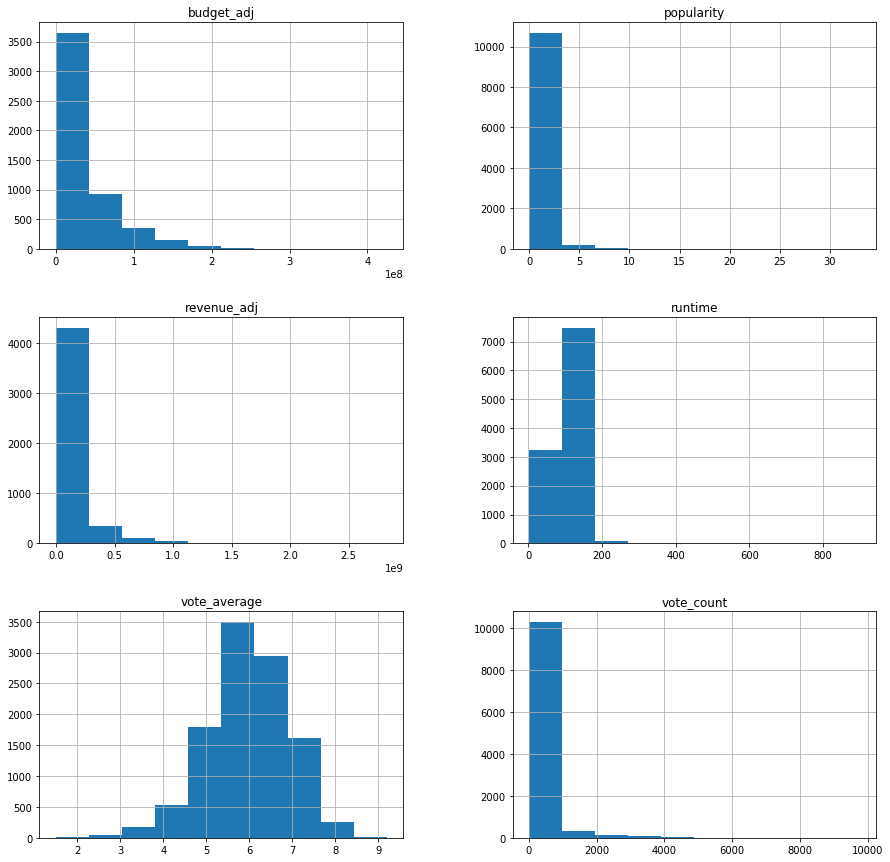

In [26]:
df[['popularity', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']].hist(figsize=(15,15))
plt.show()

In [27]:
df_nulls = df.isnull().sum().sort_values(ascending=False)

print('Share of missing values')
df_nulls[df_nulls > 0] / df.shape[0]

Share of missing values


revenue_adj    0.553705
budget_adj     0.524252
director       0.004050
runtime        0.002853
dtype: float64

Missing values in "director" column isn't significant, and it's equal 0.41%. So we'll only look at non-missing data.
The same could be applied to "runtime" column, and share of NaN is equal 0.29%. here we'll also look at non-missing data.
More than 50% of missing values in revenues and budget will significantly distort results. Replace a half of missing values with any measure of center won't produce accurate results. So, one way is somehow impute NaN. The other way is to analyse only data with valid not-zero numbers. And some other scenarios.  
In the following analyses wil be used only not-zero budgets and revenues.

In [28]:
df = df[(df.director.notnull()) & (df.runtime.notnull())]

In [29]:
print('Final shape', df.shape)
df.head()

Final shape (10792, 36)


,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
0,32.985763,Jurassic World,Colin Trevorrow,124.0,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28.419936,Mad Max: Fury Road,George Miller,120.0,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.112507,Insurgent,Robert Schwentke,119.0,2480,6.3,1.012000e+08,2.716190e+08,2015-03-18,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,5292,7.5,1.839999e+08,1.902723e+09,2015-12-15,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,9.335014,Furious 7,James Wan,137.0,2947,7.3,1.747999e+08,1.385749e+09,2015-04-01,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<a id='eda'></a>
## Exploratory Data Analysis

__Research questions:__
1. Which genres are most popular from year to year?  
2. How sharp is the divide between major film studios and the independents?  
3. What kinds of properties are associated with movies that have high revenues?  
4. Top-8 directors made more than 20 movies. Whether their movies are also popular or profitable than movies of the other directos?

### Research Question 1: Which genres are most popular from year to year?

In [30]:
df.popularity.describe()

count    10792.000000
mean         0.649765
std          1.002611
min          0.000188
25%          0.209737
50%          0.385598
75%          0.717722
max         32.985763
Name: popularity, dtype: float64

In [31]:
df[df.popularity == df.popularity.max()]

,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
0,32.985763,Jurassic World,Colin Trevorrow,124.0,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Most of the popularity ratings are less than 1. The distribution of popularity is right skewed with maximum rating 32.99 of movie "Jurassic World" (2015).

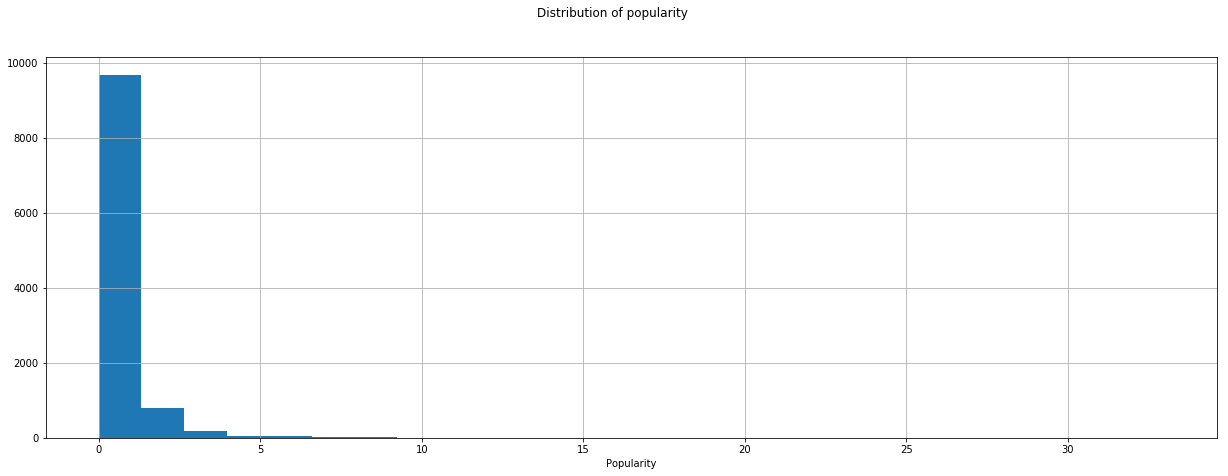

In [32]:
df.popularity.hist(figsize=(21,7), bins=25)
plt.xlabel('Popularity')
plt.suptitle('Distribution of popularity')
plt.show()

From 1960 to 2015 the number of movies increased with the corresponding increase of average opularity rate. However, some movies became popular since 20 century. For example, "The Godfather" (1972) has 5.74 popularity rate.

In [33]:
df[(df.release_date >= '1972-01-01') & (df.release_date <= '1974-01-01')].sort_values('popularity',
                                                            ascending=False).iloc[0, :9]

popularity                     5.73803
original_title           The Godfather
director          Francis Ford Coppola
runtime                            175
vote_count                        3970
vote_average                       8.3
budget_adj                 3.12874e+07
revenue_adj                1.27791e+09
release_date       1972-03-15 00:00:00
Name: 7269, dtype: object

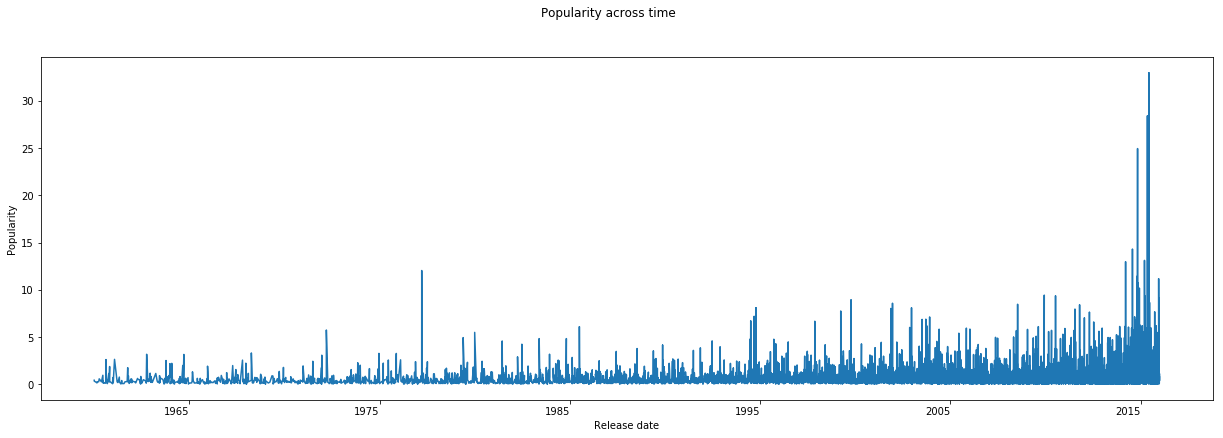

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(21,7))
df.plot(x='release_date', y='popularity', rot=0, legend=False, kind='line', ax=ax)
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.suptitle('Popularity across time')
# ax.set_yscale('log')
plt.show()

Among all 10 thound movies, Adventure is the most popular genre with average popularity about 1.2.

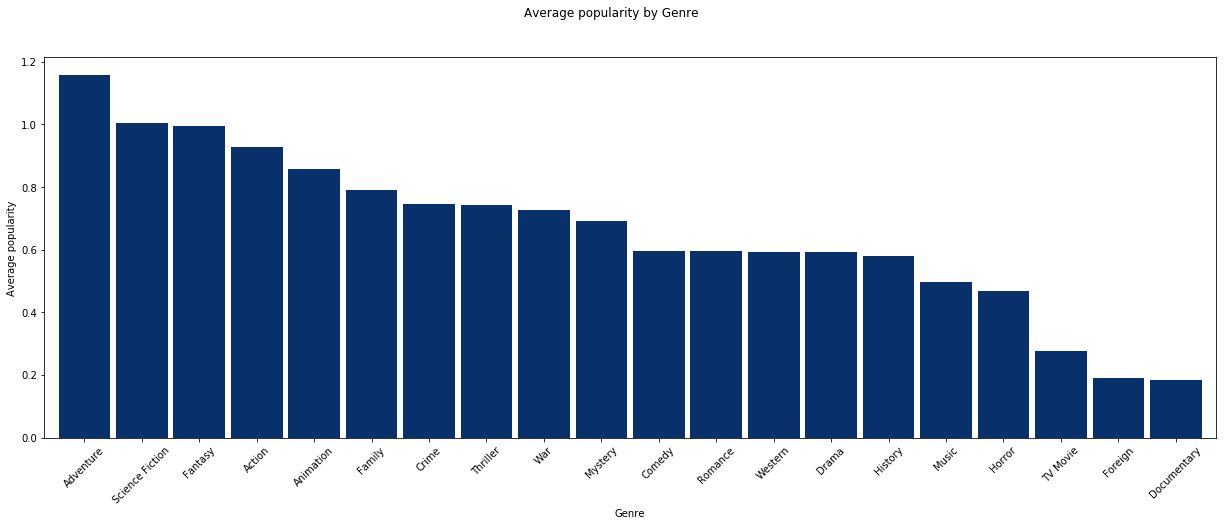

In [35]:
temp_lst = []
for col in genre_unique:
    temp_lst.append(df[df[col] == 1].popularity.mean())

popularity_by_genre = pd.DataFrame({'Genre': genre_unique, 'Mean popularity': temp_lst})
popularity_by_genre.sort_values(by='Mean popularity', ascending=False, inplace=True)
popularity_by_genre.plot(x='Genre', y='Mean popularity', rot=45, legend=False, kind='bar',
                         figsize=(21,7), cmap='Blues_r', width=.9)
plt.xlabel('Genre')
plt.ylabel('Average popularity')
plt.suptitle('Average popularity by Genre')
plt.show()

Now, that we have average popularity separately by release date and by genres, let's look at the most popular genres over time.

In [36]:
# Reshape dataset such that genre became one row and create popularity_by_genre dataset

popularity_by_genre = df[df[genre_unique[0]] == 1].groupby(df.release_date.dt.year)['popularity'].mean().reset_index()
popularity_by_genre['genre'] = genre_unique[0]
years = df.release_date.dt.year.tolist()
for col in genre_unique[1:]:
    temp = df[df[col] == 1].groupby(df.release_date.dt.year)['popularity'].mean().reset_index()
    temp['genre'] = col
    popularity_by_genre = popularity_by_genre.append(temp)

print('Genres\n', popularity_by_genre.genre.unique())
print('Average popularity\n', popularity_by_genre.popularity.mean())
popularity_by_genre.head()

Genres
 ['Drama' 'Comedy' 'Thriller' 'Action' 'Romance' 'Horror' 'Adventure'
 'Crime' 'Family' 'Science Fiction' 'Fantasy' 'Mystery' 'Animation'
 'Documentary' 'Music' 'History' 'War' 'Foreign' 'TV Movie' 'Western']
Average popularity
 0.586307521846


,release_date,popularity,genre
0,1960,0.566305,Drama
1,1961,0.432233,Drama
2,1962,0.392000,Drama
3,1963,0.322448,Drama
4,1964,0.364818,Drama


In [37]:
# Create dateset with popularity means to make visuals

df_plot = popularity_by_genre.groupby(['release_date', 'genre']).popularity.mean()

It's not a good idea to use all the genres for the last 55 years. Let's fix this in the following figure.

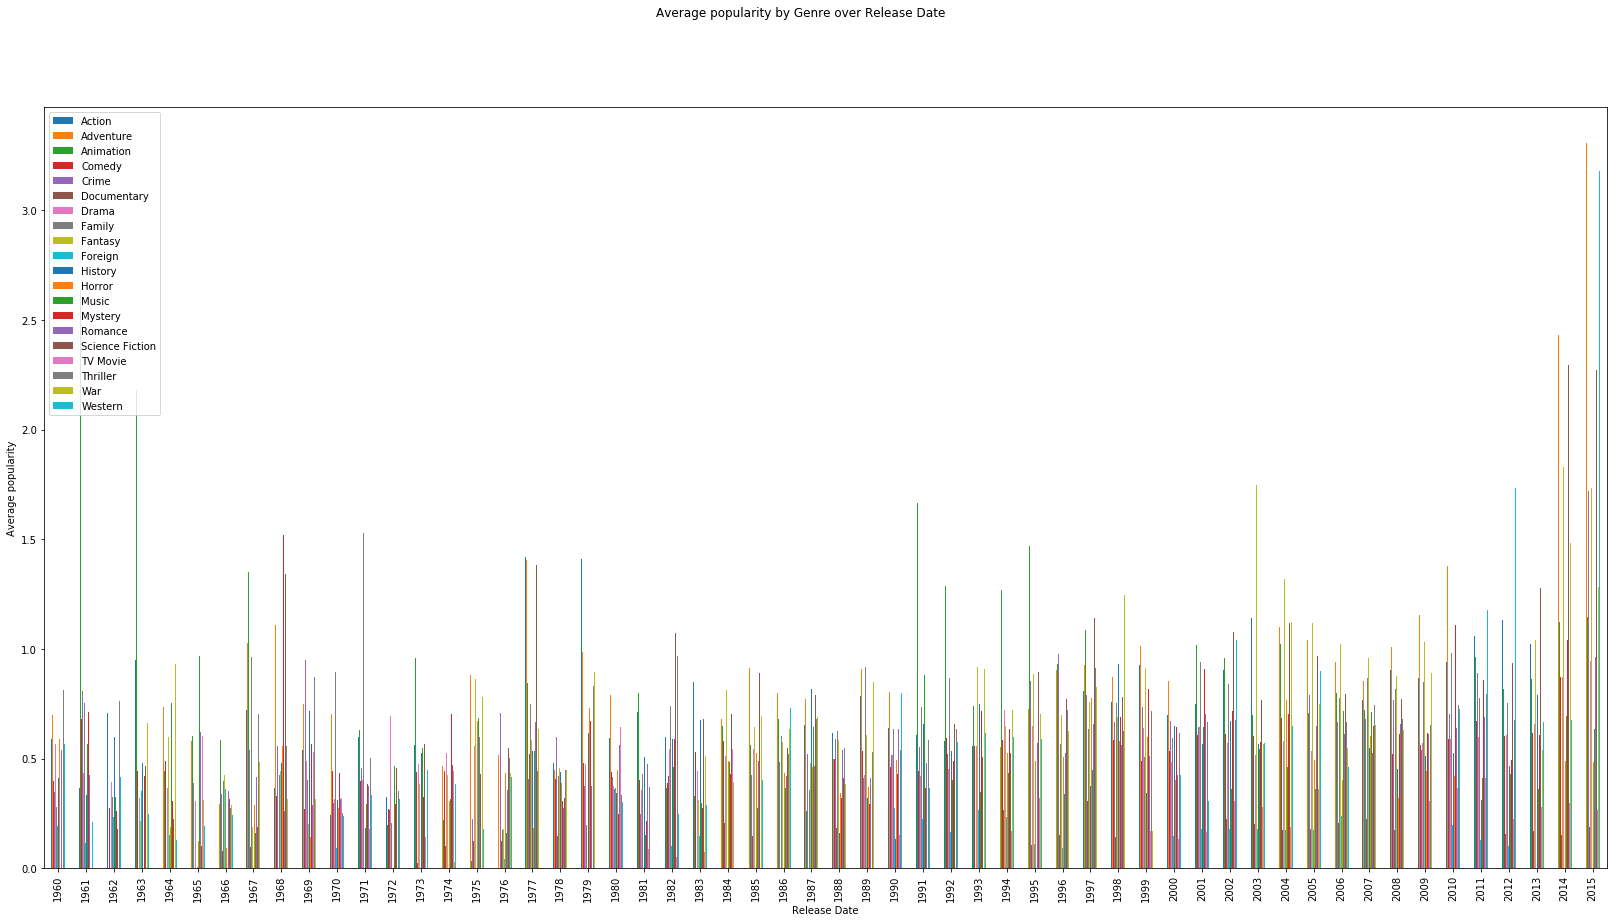

In [38]:
df_plot.sort_index(level='release_date', ascending=True).unstack().plot(
                kind='bar', figsize=(28,14))
plt.legend(loc='upper left')
plt.xlabel('Release Date')
plt.ylabel('Average popularity')
plt.suptitle('Average popularity by Genre over Release Date')
plt.show()

Get only top-5 genres from each year, so we could distinguish their popularity rates.

In [39]:
df_plot_top5 = df_plot.reset_index().sort_values(by=['release_date', 'genre'],
                                                 ascending=[True, False]).groupby('release_date').head(5)
df_plot_top5.set_index(['release_date', 'genre'], inplace=True)
df_plot_top5.head(10)

popularity
release_date genre                      
1960         Western            0.567759
             War                0.225863
             Thriller           0.811910
             Science Fiction    0.327905
             Romance            0.541227
1961         Western            0.210021
             War                0.531184
             Science Fiction    0.274103
             Romance            0.426036
             Mystery            0.712793

In [40]:
df_plot_top5.groupby('genre').popularity.mean().sort_values()

genre
TV Movie           0.285852
Romance            0.464334
Mystery            0.501919
Western            0.537787
War                0.626728
Thriller           0.645515
Science Fiction    0.763493
Name: popularity, dtype: float64

The most popular genres by popularity rate during the whole period is Science Fiction, Thriller, and Wars. Moreover, during the 20 century Romance and TV movies were also as popular as Science Fiction genre. In the 21st century Western genre has reached leading positions.

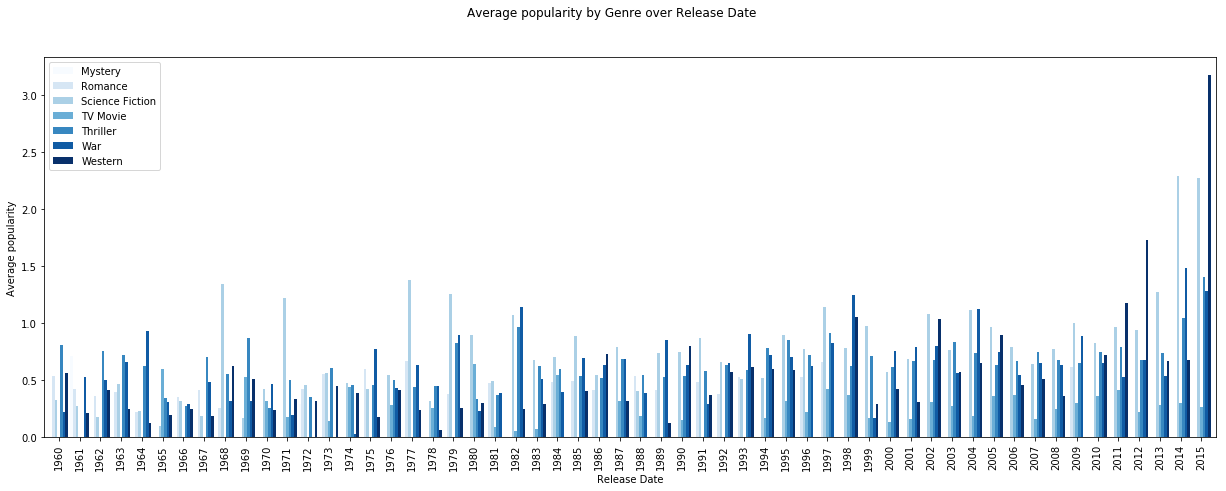

In [41]:
df_plot_top5.sort_values(['release_date', 'popularity'], ascending=[True, False]).unstack().plot(kind='bar', width=.9, figsize=(21,7), cmap='Blues')
plt.legend(['Western', 'War', 'Thriller', 'TV Movie', 'Science Fiction', 'Romance', 'Mystery'][::-1],
           loc='upper left')
plt.xlabel('Release Date')
plt.ylabel('Average popularity')
plt.suptitle('Average popularity by Genre over Release Date')
plt.show()

If we look only on top-3 genres of each year, Thriller and war genres bagin to compete for first place with each other from year to year.

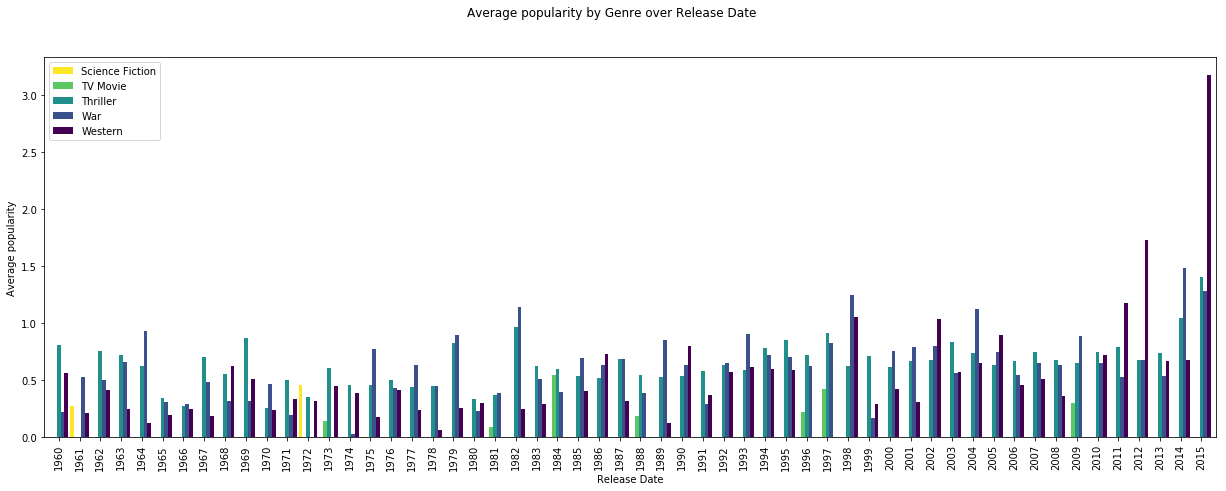

In [42]:
df_plot_top3 = df_plot.reset_index().sort_values(by=['release_date', 'genre'],
                                                 ascending=[True, False]).groupby('release_date').head(3)
df_plot_top3.set_index(['release_date', 'genre'], inplace=True)

df_plot_top3.unstack().plot(kind='bar', width=.9, figsize=(21,7), cmap='viridis_r')
plt.legend(['Western', 'War', 'Thriller', 'TV Movie', 'Science Fiction'][::-1], loc='upper left')
plt.xlabel('Release Date')
plt.ylabel('Average popularity')
plt.suptitle('Average popularity by Genre over Release Date')
plt.show()

### Research Question 2: How sharp is the divide between major film studios and the independents?

Top-2 production companies are:  
1. Universal Pictures (produced 522 movies),  
2. Warner Bros. (produced 509 movies).   

Let's look at difference between major film studios and the independents using this production companies data.

In [43]:
df.groupby(['independent_film', 'Universal_Pictures']).mean()[['popularity', 'runtime', 'vote_count', 'vote_average',
                                                              'budget_adj', 'revenue_adj']]

popularity     runtime  vote_count  \
independent_film Universal_Pictures                                       
0                0                     0.646776  102.220736  215.945171   
                 1                     0.962337  108.499055  407.565217   
1                0                     0.306643   98.840506   36.240506   
                 1                     0.327996  102.000000   23.000000   

                                     vote_average    budget_adj   revenue_adj  
independent_film Universal_Pictures                                            
0                0                       5.968410  3.657895e+07  1.138762e+08  
                 1                       6.073535  5.267046e+07  1.660731e+08  
1                0                       5.951646  9.054178e+06  5.819831e+06  
                 1                       5.800000  4.577416e+06           NaN

In [44]:
pd.crosstab(df.independent_film, df.Universal_Pictures)

Universal_Pictures,0,1
independent_film,,
0,9867,529
1,395,1


In [45]:
df.groupby(['independent_film', 'Warner_Bros']).mean()[['popularity', 'runtime', 'vote_count', 'vote_average',
                                                              'budget_adj', 'revenue_adj']]

popularity     runtime  vote_count  \
independent_film Warner_Bros                                       
0                0              0.638903  102.101156  210.486550   
                 1              1.040808  109.474960  465.922456   
1                0              0.305501   98.829949   36.269036   
                 1              0.542260  102.500000   24.000000   

                              vote_average    budget_adj   revenue_adj  
independent_film Warner_Bros                                            
0                0                5.960949  3.546243e+07  1.125606e+08  
                 1                6.176090  6.425075e+07  1.769029e+08  
1                0                5.951269  8.617312e+06  5.754943e+06  
                 1                5.950000  6.792302e+07  1.432024e+07

In [46]:
210.486550 / 36.269036, 465.922456 / 24.000000

(5.803477930871942, 19.41343566666667)

In [47]:
pd.crosstab(df.independent_film, df.Warner_Bros)

Warner_Bros,0,1
independent_film,,
0,9777,619
1,394,2


Universal Pictures made only 1 independent film (it's about 0.19% of all movies made by the company), and Warner Bros. made 2 independent films (it's about 0.32% of all movies made by the company). In comparison, 393 movies of the other companies were independent (it's about 3.67% of all movies).  
So, why major film studios don't made independent? 

Popularity rates of independent movies are twice lower (0.65 vs. 0.31, or 0.96 vs. 0.33) than not-independent ones.  
If we don't take into account missing data in revenue and budget columns, the result for independent movies is more than twice worse. Despite average votes for independent and not-independent movies are approximately the same (6 points), number of votes for independent movies is more then 5 times smaller (200-500 vs. 20-40).   
So, producing companies don't make independent movies because revenues from them are lower, or revenues from independent movies are lower because producing comanies don't make them? It's really interesting question for the further investigation and analysis.

### Research Question 3: What kinds of properties are associated with movies that have high revenues?

To answer this question, only numeric columns were considered.

In [48]:
revenue_df = df[df.revenue_adj.notnull()].sort_values(by='revenue_adj', ascending=False)
revenue_df.head()

,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
1386,9.432768,Avatar,James Cameron,162.0,8458,7.1,2.408869e+08,2.827124e+09,2009-12-10,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1329,12.037933,Star Wars,George Lucas,121.0,4428,7.9,3.957559e+07,2.789712e+09,1977-03-20,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5231,4.355219,Titanic,James Cameron,194.0,4654,7.3,2.716921e+08,2.506406e+09,1997-11-18,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10594,2.010733,The Exorcist,William Friedkin,122.0,1113,7.2,3.928928e+07,2.167325e+09,1973-12-26,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9806,2.563191,Jaws,Steven Spielberg,124.0,1415,7.3,2.836275e+07,1.907006e+09,1975-06-18,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


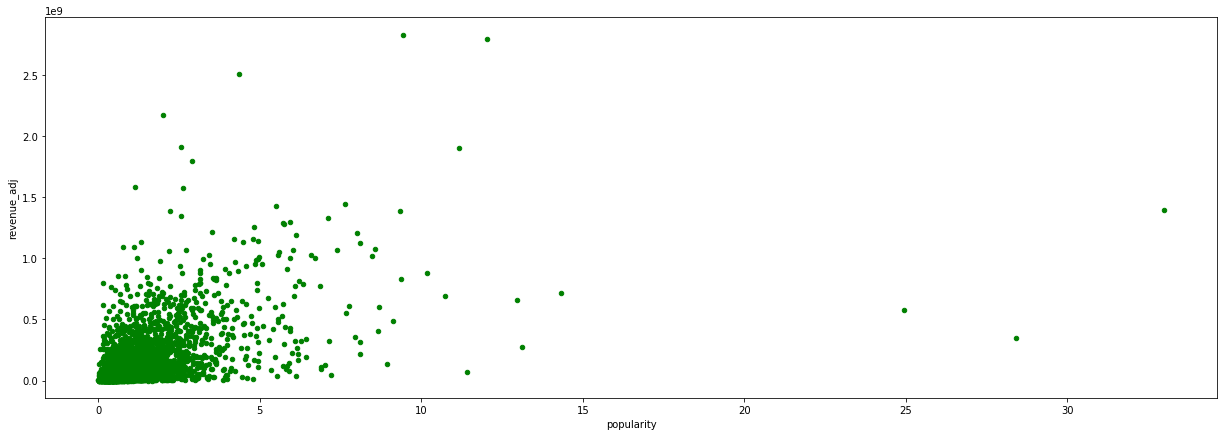

In [49]:
revenue_df[['popularity', 'revenue_adj']].plot(kind='scatter', x='popularity', y='revenue_adj', figsize=(21,7),
                                                color='green')
plt.show()

In [50]:
print('Average Revenue', revenue_df[revenue_df.popularity > 20].revenue_adj.mean())
revenue_df[revenue_df.popularity > 20]

Average Revenue 771099276.712


,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
0,32.985763,Jurassic World,Colin Trevorrow,124.0,5562,6.5,1.379999e+08,1.392446e+09,2015-06-09,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
629,24.949134,Interstellar,Christopher Nolan,169.0,6498,8.0,1.519800e+08,5.726906e+08,2014-11-05,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,28.419936,Mad Max: Fury Road,George Miller,120.0,6185,7.1,1.379999e+08,3.481613e+08,2015-05-13,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


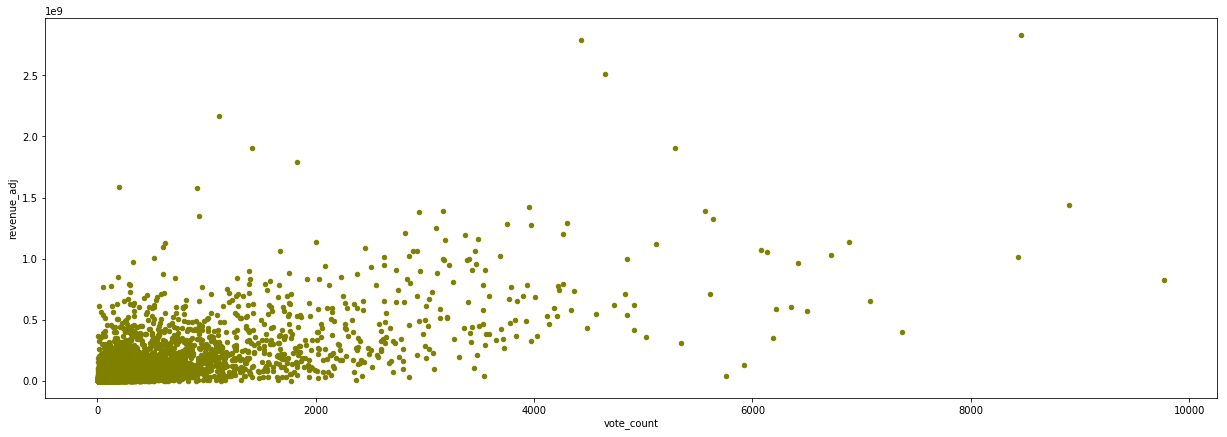

In [51]:
revenue_df[['vote_count', 'revenue_adj']].plot(kind='scatter', x='vote_count', y='revenue_adj', figsize=(21,7),
                                              color='olive')
plt.show()

In [52]:
print('Average Revenue', revenue_df[revenue_df.vote_count > 8000].revenue_adj.mean())
revenue_df[revenue_df.vote_count > 8000]

Average Revenue 1527637054.52


,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
1386,9.432768,Avatar,James Cameron,162.0,8458,7.1,2.408869e+08,2.827124e+09,2009-12-10,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4361,7.637767,The Avengers,Joss Whedon,143.0,8903,7.3,2.089437e+08,1.443191e+09,2012-04-25,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2875,8.466668,The Dark Knight,Christopher Nolan,152.0,8432,8.1,1.873655e+08,1.014733e+09,2008-07-16,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1919,9.363643,Inception,Christopher Nolan,148.0,9767,7.9,1.600000e+08,8.255000e+08,2010-07-14,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


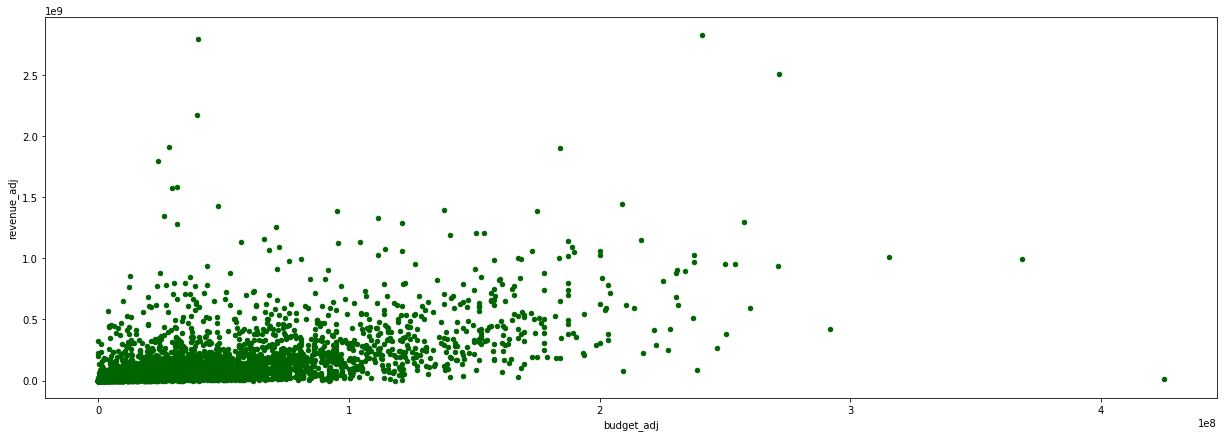

In [53]:
revenue_df[['budget_adj', 'revenue_adj']].plot(kind='scatter', x='budget_adj', y='revenue_adj', figsize=(21,7),
                                              color='darkgreen')
plt.show()

In [54]:
print('Average Revenue', revenue_df[revenue_df.budget_adj > 300000000].revenue_adj.mean())
revenue_df[revenue_df.budget_adj > 300000000]

Average Revenue 670719525.753


,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
7387,4.965391,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,2626,6.8,3.155006e+08,1.010654e+09,2007-05-19,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3375,4.955130,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136.0,3180,6.3,3.683713e+08,9.904175e+08,2011-05-11,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2244,0.250540,The Warrior's Way,Sngmoo Lee,100.0,74,6.4,4.250000e+08,1.108757e+07,2010-12-02,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


The relationship between revenue and popularity, revenue and number of votes, revenue and budget is positive.  
Some outliers are present in the dataset, so:  
* 3 movies with the highest popularity made on average \$771099276.71 (Jurassic World (2015), Interstellar (2014), Mad Max: Fury Road (2015)),  
* 4 movies with the number of votes higher than 8000 gathered on average, \$1527637054.52 (Avatar (2009), The Avengers (2012), The Dark Knight (2008), Inception (2010)),  
* 3 movies with the highest budget made on average \$670719525.753 (Pirates of the Caribbean: At World's End (2001), Pirates of the Caribbean: On Stranger Tides (2011), The Warrior's Way (2010)).

### Research Question 4: Top-8 directors made more than 20 movies.
#### Whether their movies are also popular or profitable than movies of the other directos?

In [55]:
directors = directors_df.iloc[:8].index.tolist()
top8_directors = df[df.director.isin(directors)]
print('Shape', top8_directors.shape)
top8_directors.head()

Shape (225, 36)


,popularity,original_title,director,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_date,Robert_De_Niro,Samuel_L_Jackson,woman_director,independent_film,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western,Universal_Pictures,Warner_Bros,Paramount_Pictures
7,7.667400,The Martian,Ridley Scott,141.0,4572,7.6,9.935996e+07,5.477497e+08,2015-09-30,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
33,3.648210,Bridge of Spies,Steven Spielberg,141.0,1638,7.1,3.679998e+07,1.496016e+08,2015-10-15,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,2.345821,In the Heart of the Sea,Ron Howard,122.0,805,6.4,9.199996e+07,8.631506e+07,2015-11-20,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
155,1.007054,Irrational Man,Woody Allen,95.0,319,6.1,1.012000e+07,2.519979e+07,2015-07-17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
572,0.082569,The Audition,Martin Scorsese,16.0,10,6.1,NaN,NaN,2015-10-27,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
means_ = top8_directors.groupby('director')[['popularity', 'vote_average', 'budget_adj', 'revenue_adj']
                                            + genre_unique].mean().sort_values('popularity', ascending=False)
means_

,popularity,vote_average,budget_adj,revenue_adj,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western
director,,,,,,,,,,,,,,,,,,,,,,,,
Ridley Scott,2.009294,6.478261,7.909806e+07,1.917985e+08,0.739130,0.086957,0.391304,0.521739,0.130435,0.086957,0.347826,0.304348,0.000000,0.173913,0.043478,0.043478,0.000000,0.000000,0.000000,0.130435,0.130435,0.0,0.0,0.000000
Steven Spielberg,1.875138,6.824138,7.419896e+07,5.630536e+08,0.517241,0.103448,0.206897,0.379310,0.034483,0.068966,0.413793,0.068966,0.103448,0.241379,0.103448,0.137931,0.034483,0.000000,0.000000,0.172414,0.172414,0.0,0.0,0.000000
Ron Howard,1.295499,6.377273,8.682048e+07,2.515053e+08,0.636364,0.409091,0.272727,0.227273,0.181818,0.000000,0.181818,0.045455,0.090909,0.045455,0.090909,0.136364,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.0,0.090909
Martin Scorsese,1.128548,6.958621,5.473410e+07,1.348079e+08,0.793103,0.137931,0.206897,0.000000,0.172414,0.000000,0.034483,0.310345,0.034483,0.000000,0.000000,0.034483,0.000000,0.137931,0.172414,0.034483,0.000000,0.0,0.0,0.000000
Steven Soderbergh,0.945138,6.172727,4.068058e+07,1.456043e+08,0.772727,0.227273,0.363636,0.045455,0.227273,0.000000,0.000000,0.409091,0.000000,0.090909,0.000000,0.181818,0.000000,0.000000,0.000000,0.090909,0.136364,0.0,0.0,0.000000
Clint Eastwood,0.830037,6.508824,4.264728e+07,1.407573e+08,0.794118,0.117647,0.323529,0.323529,0.147059,0.000000,0.147059,0.382353,0.000000,0.029412,0.029412,0.147059,0.000000,0.000000,0.088235,0.088235,0.117647,0.0,0.0,0.176471
Joel Schumacher,0.768102,5.971429,5.768043e+07,1.309330e+08,0.666667,0.190476,0.619048,0.190476,0.142857,0.142857,0.047619,0.428571,0.047619,0.190476,0.095238,0.142857,0.000000,0.000000,0.000000,0.000000,0.047619,0.0,0.0,0.000000
Woody Allen,0.563424,6.444444,1.848060e+07,5.882820e+07,0.533333,0.844444,0.133333,0.066667,0.444444,0.000000,0.000000,0.133333,0.000000,0.022222,0.044444,0.088889,0.000000,0.000000,0.000000,0.022222,0.000000,0.0,0.0,0.000000


The most popular genres are Drama, Action, and Crime.

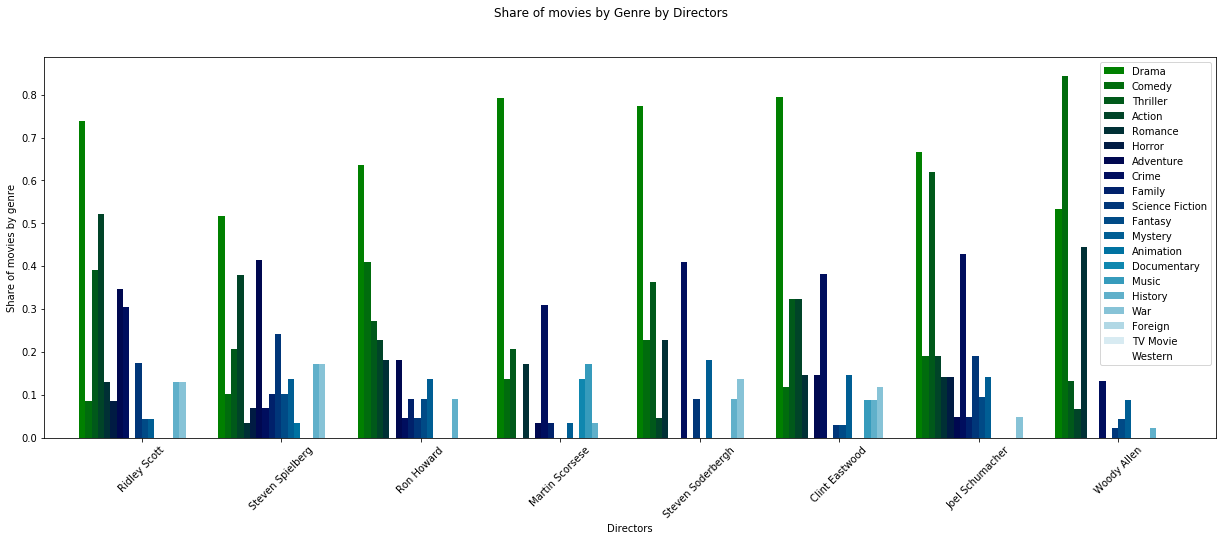

In [57]:
means_[genre_unique].plot(kind='bar', width=.9, rot=45, figsize=(21,7), cmap='ocean')
plt.legend(loc='best')
plt.xlabel('Directors')
plt.ylabel('Share of movies by genre')
plt.suptitle('Share of movies by Genre by Directors')
plt.show()

Movies of Ridley Scott have the highest average popularity rate (2.01), compared to the next Steven Spielberg's movies with average popularity rate equals 1.88.

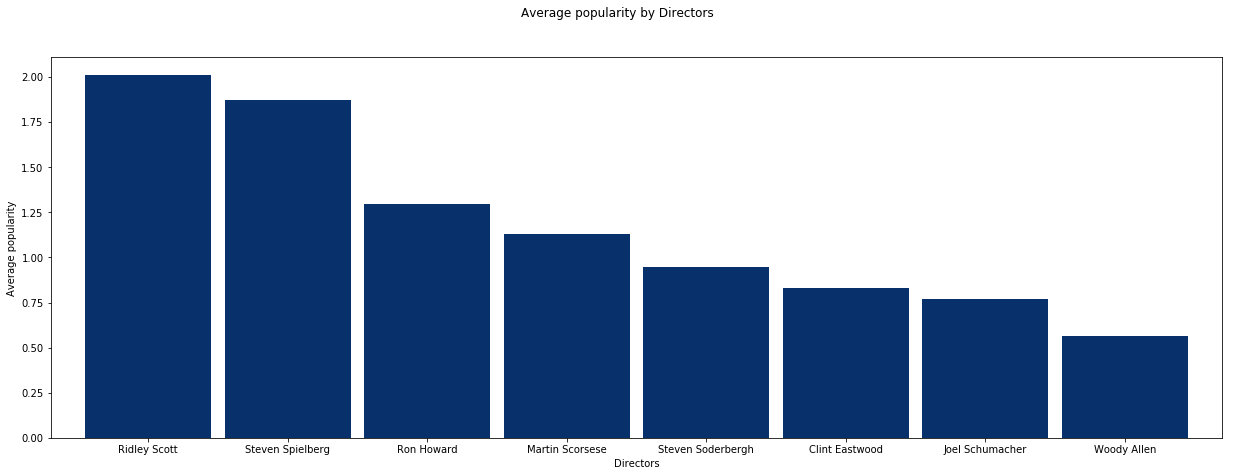

In [58]:
means_['popularity'].sort_values(ascending=False).plot(kind='bar', width=.9, rot=0, figsize=(21,7),
                                                       cmap='Blues_r', legend=False)
plt.xlabel('Directors')
plt.ylabel('Average popularity')
plt.suptitle('Average popularity by Directors')
plt.show()

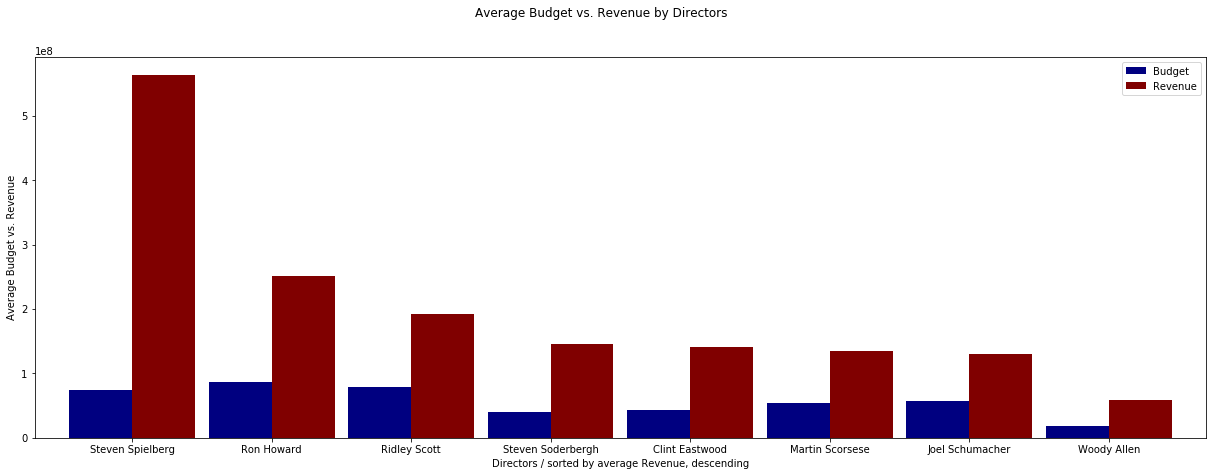

In [59]:
means_[['budget_adj', 'revenue_adj']].sort_values('revenue_adj', ascending=False).plot(kind='bar',
                                        width=.9, rot=0, figsize=(21,7), cmap='jet')
plt.legend(['Budget', 'Revenue'], loc='best')
plt.xlabel('Directors / sorted by average Revenue, descending')
plt.ylabel('Average Budget vs. Revenue')
plt.suptitle('Average Budget vs. Revenue by Directors')
plt.show()

In [60]:
roi = ((means_['revenue_adj'] - means_['budget_adj']) / means_['budget_adj'] * 100).sort_values(ascending=False)
print('Average ROI', roi.mean())
roi

Average ROI 246.324639484


director
Steven Spielberg     658.842923
Steven Soderbergh    257.920973
Clint Eastwood       230.049812
Woody Allen          218.324059
Ron Howard           189.684298
Martin Scorsese      146.295994
Ridley Scott         142.481863
Joel Schumacher      126.997194
dtype: float64

Finally, average ROI of movies of directors from these group is 246%. Moreover, ROI of movies directed by Steven Spielberg equals 658%.

<a id='conclusions'></a>
## Conclusions

In this project TMDb Movie Data was analyzed. This dataset contains information about 10,000 movies, including user ratings and revenue.  
  
There're 2 main parts in this Jupyter notebook:  
1. Data Wrangling,  
2. Exploratory Data Analysis.
  
First part consists of the following blocks:  
* General Properties,  
* Data Cleaning,  
* Data visualization.

In the second part the following research questions were considered:  
1. Which genres are most popular from year to year? 
Most of the popularity ratings are less than 1. The distribution of popularity is right skewed with maximum rating 32.99 of movie "Jurassic World" (2015).  
From 1960 to 2015 the number of movies increased with the corresponding increase of average opularity rate. However, some movies became popular since 20 century. For example, "The Godfather" (1972) has 5.74 popularity rate.  
Among all 10 thound movies, Adventure is the most popular genre with average popularity about 1.2.  
The most popular genres by popularity rate during the whole period is Science Fiction, Thriller, and Wars. Moreover, during the 20 century Romance and TV movies were also as popular as Science Fiction genre. In the 21st century Western genre has reached leading positions.   
If we look only on top-3 genres of each year, Thriller and war genres bagin to compete for first place with each other from year to year.  
___________________  
2. How sharp is the divide between major film studios and the independents?  
Top-2 production companies are:  
-> Universal Pictures (produced 522 movies),  
-> Warner Bros. (produced 509 movies).   
Universal Pictures made only 1 independent film (it's about 0.19% of all movies made by the company), and Warner Bros. made 2 independent films (it's about 0.32% of all movies made by the company). In comparison, 393 movies of the other companies were independent (it's about 3.67% of all movies).  
So, why major film studios don't made independent?   
Popularity rates of independent movies are twice lower (0.65 vs. 0.31, or 0.96 vs. 0.33) than not-independent ones.  
If we don't take into account missing data in revenue and budget columns, the result for independent movies is more than twice worse. Despite average votes for independent and not-independent movies are approximately the same (6 points), number of votes for independent movies is more then 5 times smaller (200-500 vs. 20-40).   
So, producing companies don't make independent movies because revenues from them are lower, or revenues from independent movies are lower because producing comanies don't make them? It's really interesting question for the further investigation and analysis.  
___________________  
3. What kinds of properties are associated with movies that have high revenues?  
To answer this question, only numeric columns were considered.  
The relationship between revenue and popularity, revenue and number of votes, revenue and budget is positive.  
Some outliers are present in the dataset, so:  
~ 3 movies with the highest popularity made on average \\$771099276.71 (Jurassic World (2015), Interstellar (2014), Mad Max: Fury Road (2015)),  
~ 4 movies with the number of votes higher than 8000 gathered on average, \\$1527637054.52 (Avatar (2009), The Avengers (2012), The Dark Knight (2008), Inception (2010)),  
~ 3 movies with the highest budget made on average \\$670719525.753 (Pirates of the Caribbean: At World's End (2001), Pirates of the Caribbean: On Stranger Tides (2011), The Warrior's Way (2010)).  
___________________  
4. Top-8 directors made more than 20 movies. Whether their movies are also popular or profitable than movies of the other directos?  
Movies of Ridley Scott have the highest average popularity rate (2.01), compared to the next Steven Spielberg's movies with average popularity rate equals 1.88.  
The most popular genres are Drama, Action, and Crime.  
Finally, average ROI of movies of directors from these group is 246%. Moreover, ROI of movies directed by Steven Spielberg equals 658%.
___________________  


In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0